# The Journey from Mathematics to Machine Learning

## Series 1: Linear algebra

### Episode 6: Finding the minimum and visualizing weight values

- Derivatives (Mathematics)
    1. Police radar
    2. Product, Quotient, Power, and Chain rules
    3. Finding maximum or minimum
- Neural learning (Jupyter Notebook)
    1. [Gradient descent with multiple inputs network](#1.-Gradient-descent-with-multiple-inputs-network)
    2. [Gradient descent with multiple outputs network](#2.-Gradient-descent-with-multiple-outputs-network)
    3. [Gradient descent with multiple inputs & outputs network](#3.-Gradient-descent-with-multiple-inputs-&-outputs-network)
- Visualizing the weights (The Most IMPORTANT part) (Jupyter Notebook)
    1. [Multiple inputs & outputs network on MNIST dataset](#1.-Multiple-inputs-&-outputs-network-on-MNIST-dataset)

    
    

## 1. Multiple inputs & outputs network on MNIST dataset

In [1]:
import torchvision
from torchvision import transforms

In [3]:
train_dataset = torchvision.datasets.MNIST(root='./dataset', train=True, download=True, transform=transforms.ToTensor())

label: 4


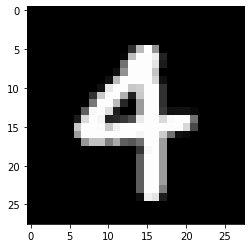

In [20]:
import random
import matplotlib.pyplot as plt
import numpy as np

random_idx = random.randint(0, len(train_dataset))
train_input, train_label = train_dataset.__getitem__(random_idx)
print(f'label: {train_label}')

def imshow(img):
    plt.imshow(np.transpose(img, (1, 2, 0)))

imshow(torchvision.utils.make_grid(train_input))

In [30]:
train_input

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

### Data

In [46]:
input = train_input.numpy().flatten()

true = []
for i in range(10):
    if i != train_label:
        true.append(0)
    else:
        true.append(1)
        
print(input.shape)
print(true)

(784,)
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


### Network

In [47]:
def neural_network(input: 'vector', weights: 'matrix') -> 'vector':
    """
    Multiple inputs and outputs network
    It performs three independent weighted sums of the input
    # 1x784 * 784x10 = 1x10
    """
    pred = input.dot(weights)
    return pred

### Hyperparameter

In [48]:
epoch = 100
alpha = 0.01

### Parameters

In [57]:
weights = np.random.rand(784,10)
#weights = np.zeros((784,10))
weights.shape

(784, 10)

### Learning

In [58]:
for iteration in range(epoch):
    pred = neural_network(input, weights)
    error = (pred - true) ** 2
    
    delta = pred - true
    weights_delta = np.outer(input, delta) # 784x1 * 1x10 = 784 x 10
    
    weights -= weights_delta * alpha
    print(f'Iteration: {iteration+1} \nError: {error} \nPrediction: {pred} \nTrue: {true}\n')

Iteration: 1 
Error: [2591.17755364 2874.31786357 2887.21639415 2428.24515235 3208.73304589
 3432.87581661 2769.82621912 3226.90534342 3597.18759779 2930.79950897] 
Prediction: [50.90361042 53.61266514 53.73282418 49.27722752 57.64567985 58.59074856
 52.6291385  56.80585659 59.97655874 54.13685906] 
True: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

Iteration: 2 
Error: [4.23739648 4.70042062 4.7215138  3.97095037 5.24729542 5.61383988
 4.52954366 5.27701288 5.88254172 4.79278601] 
Prediction: [2.05849374 2.16804534 2.17290446 1.99272436 3.29069758 2.36935432
 2.12827246 2.29717498 2.42539517 2.18924325] 
True: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

Iteration: 3 
Error: [0.00692949 0.00768668 0.00772117 0.00649376 0.00858099 0.00918041
 0.00740724 0.00862959 0.00961982 0.00783772] 
Prediction: [0.08324354 0.0876737  0.0878702  0.08058388 1.09263364 0.09581444
 0.08606532 0.09289558 0.09808068 0.08853092] 
True: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

Iteration: 4 
Error: [1.13319059e-05 1.25701534e-05 1.26265621e

In [59]:
shaped_weight = weights.T.reshape((10,28,28))
shaped_weight.shape

(10, 28, 28)

output node: 0


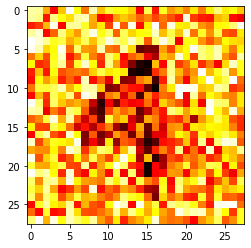

output node: 1


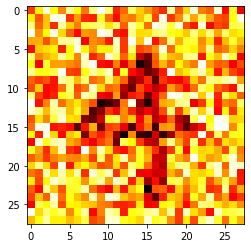

output node: 2


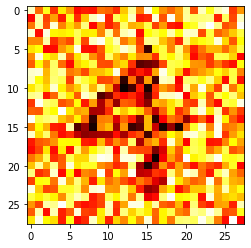

output node: 3


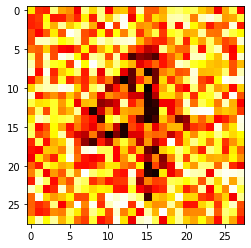

output node: 4


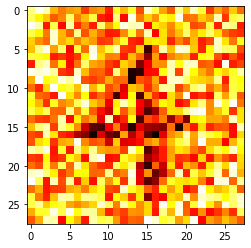

output node: 5


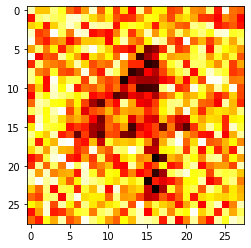

output node: 6


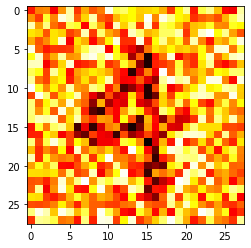

output node: 7


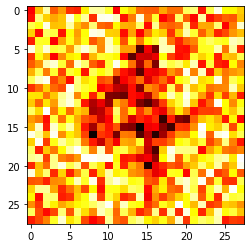

output node: 8


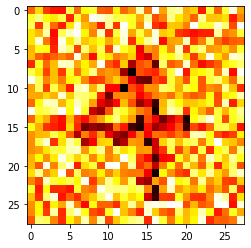

output node: 9


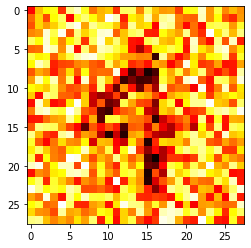

In [60]:
for i in range(10):
    print(f'output node: {i}')
    plt.imshow(shaped_weight[i], cmap='hot')
    plt.show()

In [ ]:
shaped_weight[train_label]